In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import signal
from sklearn.preprocessing import LabelEncoder
import mne


# definições de filtros

# filtro em que você deseja extrair frequências em uma faixa específica de interesse
def butter_bandpass(data, lowcut, highcut, fs=512, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)

# filtro usado quando você deseja remover componentes de alta frequência do sinal
def butter_lowpass(data, lowcut, fs=512, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)

# filtro usado para remover componentes de baixa frequência do sinal
def butter_highpass(data, highcut, fs=512, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)

# filtro para remover interferências de frequência, como ruído elétrico de 50 ou 60 Hz em dados EEG.
def butter_notch(data, cutoff, var=1, fs=512, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

In [19]:
# psd é pegar todos os dados transformados no domínio do tempo e frequência, deixando mais evidente as informações com a amplitude (potência mais alta)
# quando coloca no domínio da frequência vem a parte imaginária, por isso faz módulo. psd consegue mostrar a parte imaginária. serve para a classificação
# cores -> energia do sinal 
def print_graphs(data):
    for i in range(0, 21, 3):
        plt.plot(data[i,:])
    plt.title('Domínio do tempo')
    plt.show()

    for i in range(0, 21, 3):
        plt.psd(data[i,:], Fs=512)
    plt.title('Domínio da frequência')
    plt.show()

    for i in range(0, 21, 3):
        plt.specgram(data[i,:], Fs=512)
    plt.title('Espectograma')
    plt.show()

In [20]:
data = np.load("../datasets/avi/single/data_single.npy")
print(data.shape)

(84, 15360)


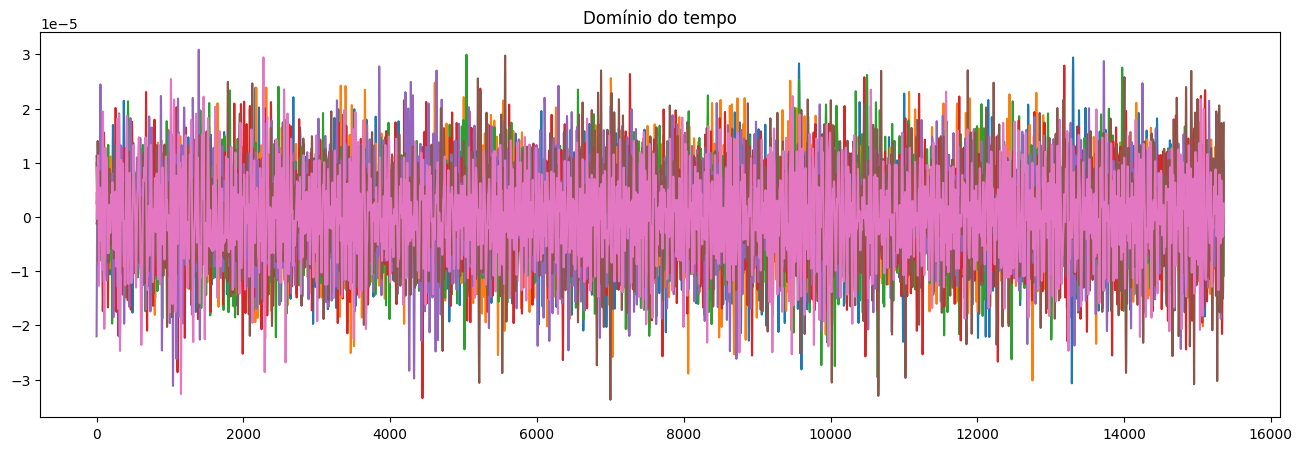

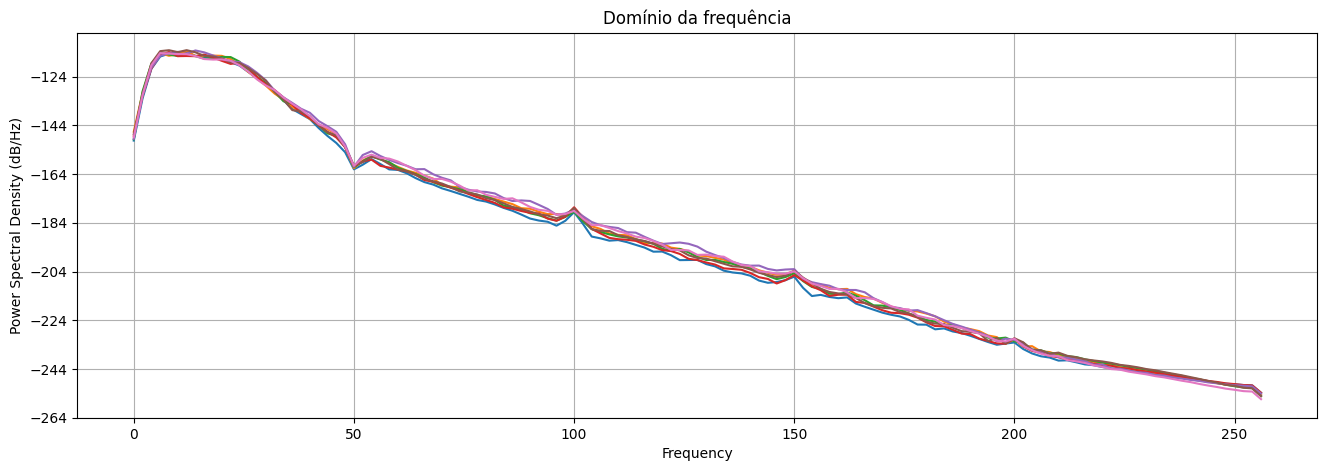

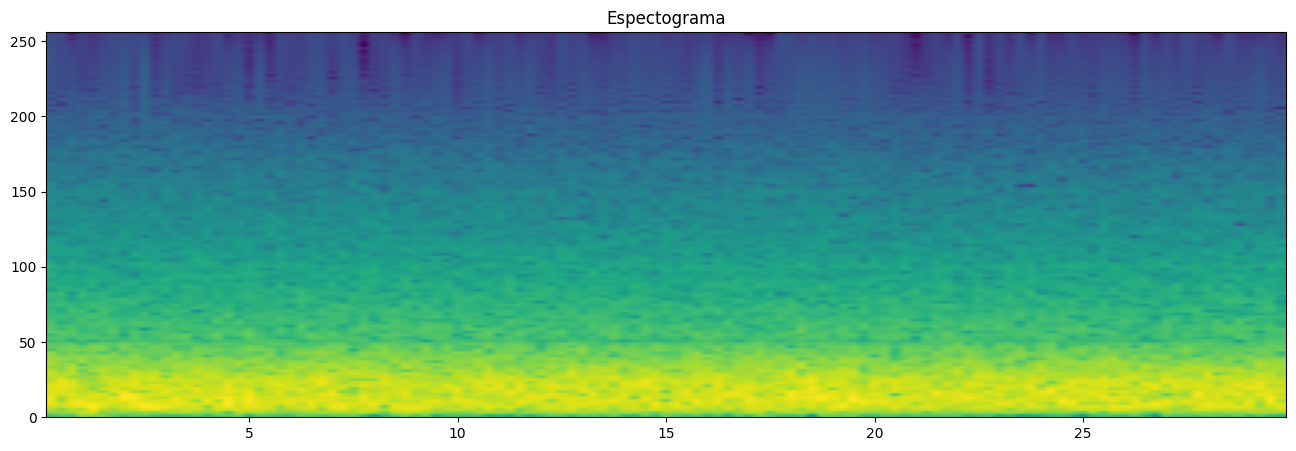

In [21]:
# definição dos tamanhos das figuras
rcParams['figure.figsize'] = [16., 5.]
print_graphs(data)

In [22]:
#abcissa = frequencias
# criação de um objeto "info"
n_channels = 1 # criação de um canal. no beta vai ter mais
sfreq = 512 #64 beta; 512 amostras serão registradas pors egundo (2x256)
ch_names = ['Oz'] # nome do canal
ch_types = ['eeg'] # tipo do canal
info = mne.create_info(ch_names, sfreq=sfreq, ch_types=ch_types)
info

<Info | 7 non-empty values
 bads: []
 ch_names: Oz
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 512.0 Hz
>

In [23]:
from sklearn.preprocessing import LabelEncoder

labels = np.load("../datasets/avi/single/labels_single.npy")
print(labels, labels.shape)


[10.  10.  10.   6.5  6.5  6.5  6.   6.   6.   7.5  7.5  7.5  7.   7.
  7.   8.2  8.2  8.2  9.3  9.3  9.3 10.  10.  10.   6.5  6.5  6.5  6.
  6.   6.   7.5  7.5  7.5  7.   7.   7.   8.2  8.2  8.2  9.3  9.3  9.3
 10.  10.  10.   6.5  6.5  6.5  6.   6.   6.   7.5  7.5  7.5  7.   7.
  7.   8.2  8.2  8.2  9.3  9.3  9.3 10.  10.  10.   6.5  6.5  6.5  6.
  6.   6.   7.5  7.5  7.5  7.   7.   7.   8.2  8.2  8.2  9.3  9.3  9.3] (84,)


In [24]:
# data : array, shape (n_epochs, n_channels, n_times)
data_correct = data.reshape(data.shape[0], 1, data.shape[1])
# adicionando label como "épocas" do sinal
labels = np.load("../datasets/avi/single/labels_single.npy")
# método para transformar labels categóricos
le = LabelEncoder()
events = np.column_stack((
    np.array(range(len(labels))),
    np.zeros(84, dtype=int),
    le.fit_transform(labels))
)
print(events) # a coluna do meio cortou nada, a última coluna é identificador do evento
event_dict = {'6':0, '6.5':1, '7':2, '7.5':3, '8.2':4, '9.3':5, '10':6} # 6Hz está armazenado em 0...

[[ 0  0  6]
 [ 1  0  6]
 [ 2  0  6]
 [ 3  0  1]
 [ 4  0  1]
 [ 5  0  1]
 [ 6  0  0]
 [ 7  0  0]
 [ 8  0  0]
 [ 9  0  3]
 [10  0  3]
 [11  0  3]
 [12  0  2]
 [13  0  2]
 [14  0  2]
 [15  0  4]
 [16  0  4]
 [17  0  4]
 [18  0  5]
 [19  0  5]
 [20  0  5]
 [21  0  6]
 [22  0  6]
 [23  0  6]
 [24  0  1]
 [25  0  1]
 [26  0  1]
 [27  0  0]
 [28  0  0]
 [29  0  0]
 [30  0  3]
 [31  0  3]
 [32  0  3]
 [33  0  2]
 [34  0  2]
 [35  0  2]
 [36  0  4]
 [37  0  4]
 [38  0  4]
 [39  0  5]
 [40  0  5]
 [41  0  5]
 [42  0  6]
 [43  0  6]
 [44  0  6]
 [45  0  1]
 [46  0  1]
 [47  0  1]
 [48  0  0]
 [49  0  0]
 [50  0  0]
 [51  0  3]
 [52  0  3]
 [53  0  3]
 [54  0  2]
 [55  0  2]
 [56  0  2]
 [57  0  4]
 [58  0  4]
 [59  0  4]
 [60  0  5]
 [61  0  5]
 [62  0  5]
 [63  0  6]
 [64  0  6]
 [65  0  6]
 [66  0  1]
 [67  0  1]
 [68  0  1]
 [69  0  0]
 [70  0  0]
 [71  0  0]
 [72  0  3]
 [73  0  3]
 [74  0  3]
 [75  0  2]
 [76  0  2]
 [77  0  2]
 [78  0  4]
 [79  0  4]
 [80  0  4]
 [81  0  5]
 [82  0  5]
 [83

Not setting metadata
84 matching events found
No baseline correction applied
0 projection items activated
Need more than one channel to make topography for eeg. Disabling interactivity.



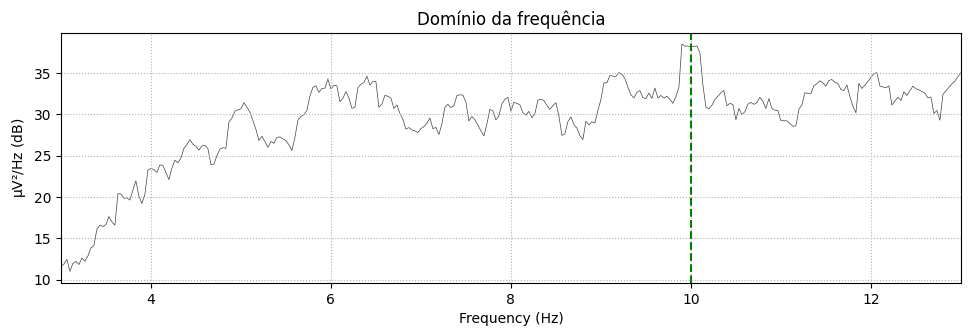

Need more than one channel to make topography for eeg. Disabling interactivity.



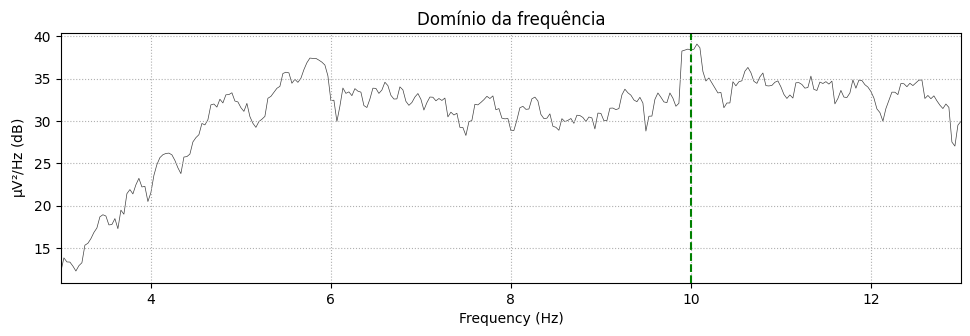

In [ ]:
import warnings
warnings.filterwarnings('ignore')


mne_data = mne.EpochsArray(data_correct, info, events, event_id=event_dict)
mne_data

for i in range(len(mne_data)):
    # view = mne_data.compute_psd(method='welch', fmin=3, fmax=13)
    view = mne_data[i].compute_psd(method='multitaper', fmin=3, fmax=13,
                                   verbose=False)
    view.plot(show=False)
    print()
    plt.title('Domínio da frequência')
    plt.axvline(x=float(list(mne_data[i].event_id)[0]), linestyle='--',
                color='green')
    plt.show()
print()

In [ ]:
filtered_mne_data = mne_data.filter(4, 12)
filtered_mne_data.save("avi_singletarget.fif")